C(sp3)-S disconection available
--------------------------------------
Option 1
Reactant 1


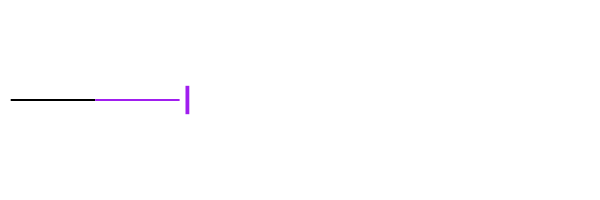

Reactant 2


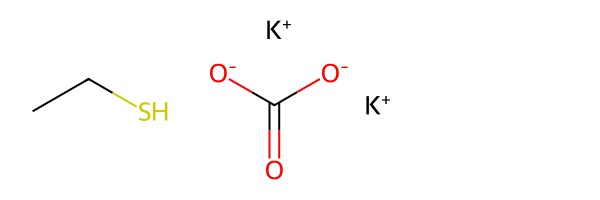

--------------------------------------
Option 2
Reactant 1


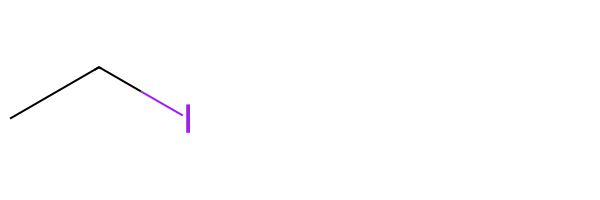

Reactant 2


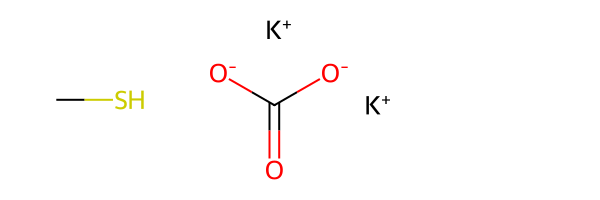

--------------------------------------
--------------------------------------


In [14]:
from chemicalbd.bond_disconnector import C_S_disconnection
from rdkit import Chem

mol = Chem.MolFromSmiles('CSCC')
reactant_list = C_S_disconnection(mol)[1]
assert Chem.MolToSmiles(reactant_list[0]) == Chem.MolToSmiles(Chem.MolFromSmiles('CI'))
assert Chem.MolToSmiles(reactant_list[1]) == Chem.MolToSmiles(Chem.MolFromSmiles('CCS'))
assert Chem.MolToSmiles(reactant_list[2]) == Chem.MolToSmiles(Chem.MolFromSmiles('C(=O)([O-])[O-].[K+].[K+]'))
assert Chem.MolToSmiles(reactant_list[3]) == Chem.MolToSmiles(Chem.MolFromSmiles('CCI'))
assert Chem.MolToSmiles(reactant_list[4]) == Chem.MolToSmiles(Chem.MolFromSmiles('CS'))
assert Chem.MolToSmiles(reactant_list[5]) == Chem.MolToSmiles(Chem.MolFromSmiles('C(=O)([O-])[O-].[K+].[K+]'))
    